In [ ]:
#Regresion lineal
#Juárez Ramírez Luis Enrique
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
# visualisacion de los datos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
#Null values
housing.isnull().sum()*100/housing.shape[0]
#Como podemos ver no se tiene ningun parametro con nulos

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [ ]:

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#Creando la funcion binaria
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
#Aplicando la funcion para housing lista

housing[varlist] = housing[varlist].apply(binary_map)

In [ ]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Convirtiendo furnishingstatus en  'status' de tres niveles

status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
# Quitando la primera columna

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
#Agregando al dataframe original
housing = pd.concat([housing, status], axis = 1)
# Quitando 'furnishingstatus'
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
#Se establece una semilla aleatoria usando np.random.seed(0) para asegurar que la división sea reproducible.
#Esto significa que cada vez que se ejecute el código, la misma semilla generará la misma división de datos.

#traing sets
from sklearn.model_selection import train_test_split
#Especificamos que el train y el train test data siempre tengan las mismas columnas
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)
#se obtienen los conjuntos de entrenamiento (df_train) y prueba (df_test) del DataFrame housing,
#con una proporción de 70% para entrenamiento y 30% para prueba, manteniendo las mismas columnas en ambos conjuntos.

In [ ]:
#Reescalando los datos ya que algunos coeficientes al momento de fittear el modelo pueden ser demasiado grandes
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Aplicando scaler() para todas las columnas excepto 'yes-no'
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train
#El método fit_transform calcula los parámetros necesarios para la escala (como la media y la desviación estándar)
# basándose en los datos de df_train[num_vars] y luego aplica la transformación de escala.



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.484848,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.175758,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.424242,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [ ]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


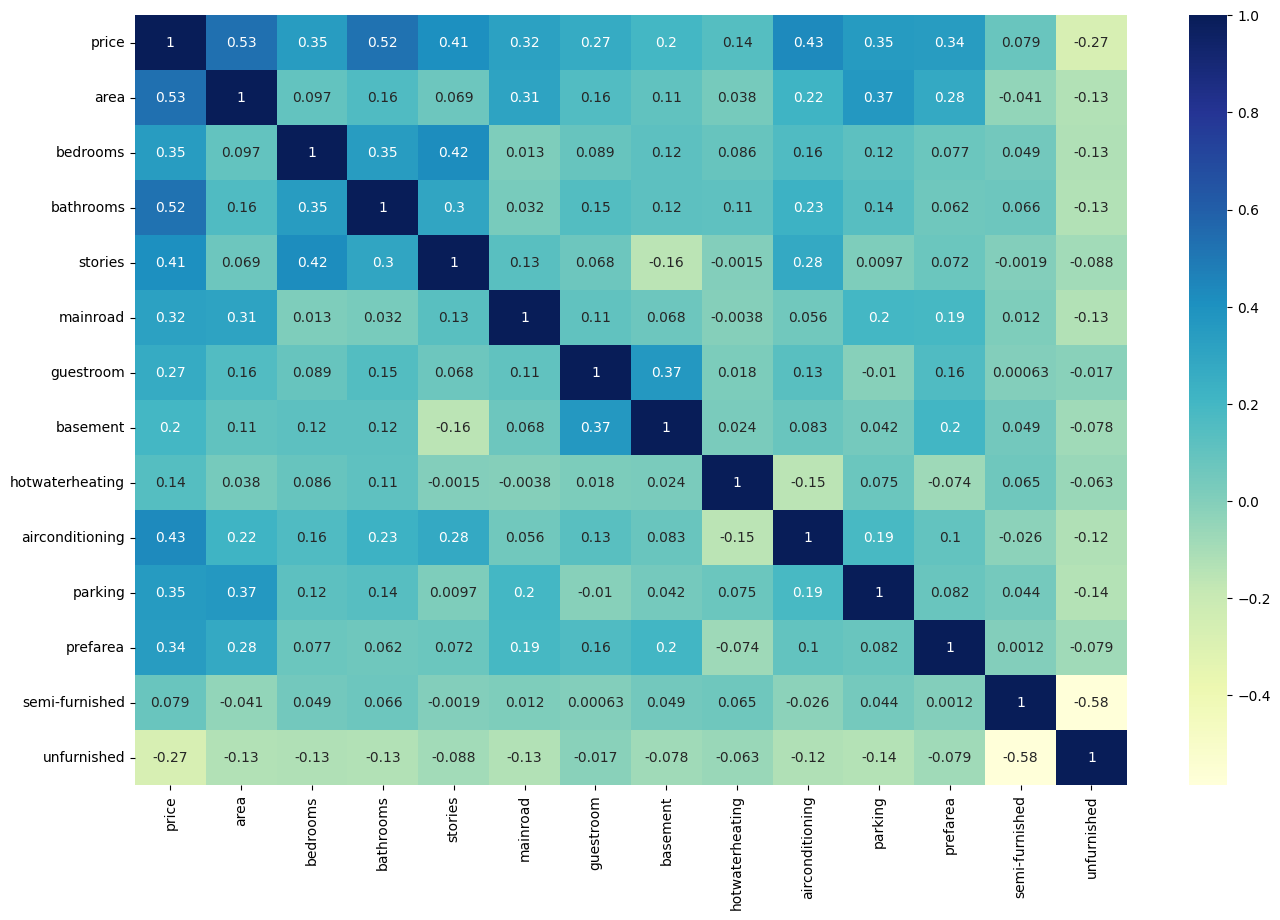

In [ ]:
#Coeficientes de correlacion

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()
 #mapa de calor de la matriz de correlación de df_train, lo que permite visualizar
 #las relaciones de correlación entre las variables numéricas del DataFrame

In [ ]:
#Dividiendo el modelo entre X y Y
y_train = df_train.pop('price')
X_train = df_train
#X_test las demas variables pero no precios
#y_t

In [ ]:
#Creación del modelo
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Corriendo RFE Recursive feature elimination con un igual a
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)
# proporciona una lista de las características del conjunto de datos ordenadas por su importancia
# relativa según el algoritmo RFE.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
#RFE es un algoritmo de selección de características que elimina iterativamente las menos importantes
#para mejorar el rendimiento del modelo de aprendizaje automático.
#Es una técnica útil para reducir la dimensionalidad de los conjuntos de datos y mejorar
#la precisión del modelo al centrarse en las características más relevantes.

[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 5),
 ('basement', False, 7),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 6)]

In [ ]:
#se utiliza para obtener las columnas o características seleccionadas por RFE.
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [ ]:
#las características que no fueron seleccionadas tienen el valor True y las características seleccionadas tienen el valor False.
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [ ]:
# Creando el  X_test dataframe con RFE variables
X_train_rfe = X_train[col]

In [ ]:
#Agregando  una constante  para estimar el término de intersección (intercepto)
# al ajustar un modelo de regresión lineal utilizando statsmodels.
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
#Corriendo el modelo
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())
# R-SQUARED Un valor de 0.631 significa que aproximadamente el 63.1% de la variabilidad de la variable dependiente
#se puede explicar por las variables independientes incluidas en el modelo

#F-statistic: 106.7
#Es el valor de la estadística F, que se utiliza para evaluar la significancia global del modelo.
#Cuanto mayor sea el valor de F y más bajo el valor p asociado (Prob (F-statistic)),
#más probable es que el modelo sea significativo.


#AIC: -693.7
#Es el criterio de información de Akaike (AIC), una medida de la calidad del ajuste del modelo que
#penaliza la inclusión de variables adicionales. Un valor menor de AIC indica un mejor ajuste del modelo.

#coef: Estos son los coeficientes estimados para cada variable independiente en el modelo de regresión lineal.
#Indican la relación o efecto de cada variable en la variable dependiente (price)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     106.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           6.98e-78
Time:                        09:27:06   Log-Likelihood:                 353.86
No. Observations:                 381   AIC:                            -693.7
Df Residuals:                     374   BIC:                            -666.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0659      0.010     

In [ ]:
 #Calculculando VIFS PARA
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#El VIF es una medida que indica la multicolinealidad entre las características.
#Un VIF mayor a 1 sugiere la presencia de multicolinealidad, y cuanto mayor sea el valor del VIF,
#mayor será la multicolinealidad.
#La multicolinealidad ocurre cuando las variables independientes (predictores) en un modelo de regresión están correlacionadas.

,Features,VIF
0,const,4.24
5,airconditioning,1.20
2,bathrooms,1.16
3,stories,1.16
1,area,1.15
6,prefarea,1.10
4,hotwaterheating,1.06


Text(0.5, 0, 'Errors')

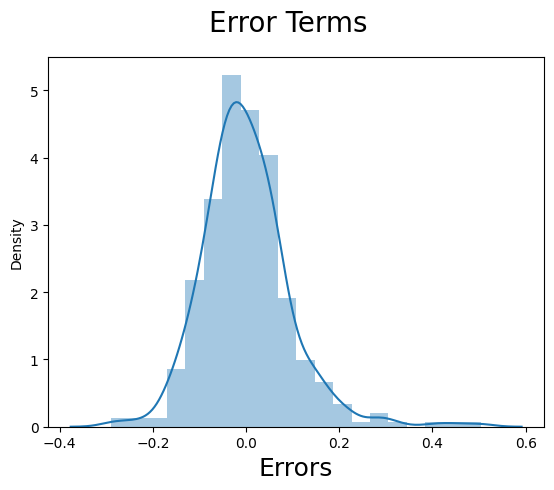

In [ ]:
#y_train representa los valores reales de la variable de respuesta en el conjunto de datos de entrenamiento,
#y y_train_price representa los valores predichos por el modelo de regresión lineal en el conjunto de entrenamiento.
y_train_price = lm.predict(X_train_rfe)
res = (y_train_price - y_train)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#HISTOGRAMA DE ERRORES
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)
#El histograma de errores residuales proporciona una visualización de la distribución de los errores del modelo.
# Si los errores están distribuidos alrededor de cero y siguen una distribución normal, esto sugiere que el modelo de regresión lineal es apropiado
# y ha capturado la relación lineal entre las variables predictoras y la variable de respuesta.

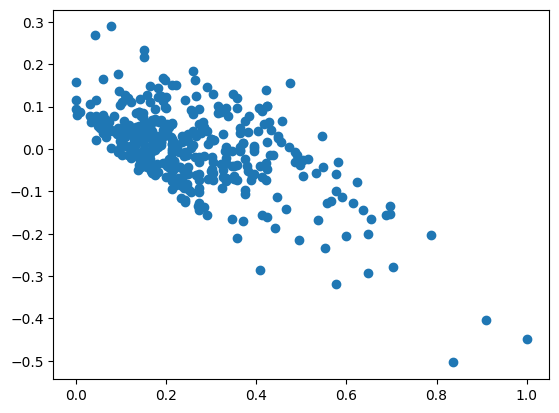

In [ ]:
plt.scatter(y_train,res)
plt.show()
#Este gráfico de dispersión es útil para visualizar la relación entre los valores reales y los errores residuales del modelo. Idealmente,
 #los errores residuales deberían distribuirse de manera aleatoria alrededor de cero sin mostrar un patrón sistemático.
 #Si se observa algún patrón o estructura en el gráfico de dispersión, podría indicar que el modelo tiene problemas para capturar ciertas
 #relaciones o que existen características no lineales en los datos que no se están teniendo en cuenta.

In [ ]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']
#variables numéricas en df_test estarán escaladas según el escalador seleccionado,
#lo que puede ayudar a garantizar que las variables tengan una escala similar.
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
# modelo de regresión lineal (lm)
#utilizando un conjunto de datos de entrenamiento (X_train_rfe y y_train)
#y realizar predicciones sobre el conjunto de datos de prueba (X_test_rfe).
y_test = df_test.pop('price')
X_test = df_test
# Agregado una variable
X_test = sm.add_constant(X_test)

# Creando X_test_new dataframe eliminando las variables de from X_test
X_test_rfe = X_test[X_train_rfe.columns]
# Haciendo Predicciones
y_pred = lm.predict(X_test_rfe)
from sklearn.metrics import r2_score
#Un valor de R2 cercano a 1 indica un buen ajuste del modelo,
#mientras que un valor cercano a 0 indica que el modelo no explica bien la variabilidad de los datos.
r2_score(y_test, y_pred)

0.5350445027578827

In [ ]:
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train_rfe, y_train)

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_rfe)

# Evaluar el modelo
precision = model.score(X_test_rfe, y_test)

In [ ]:
predicciones

array([0.20336205, 0.345004  , 0.32225637, 0.2550902 , 0.25100955,
       0.19613721, 0.43007288, 0.35645203, 0.17509252, 0.24320135,
       0.15050045, 0.30277752, 0.19950399, 0.43903726, 0.32857361,
       0.30564607, 0.45042493, 0.11732236, 0.35855049, 0.22450948,
       0.24146952, 0.11785236, 0.21310384, 0.15813247, 0.0958043 ,
       0.17583852, 0.24168152, 0.29288767, 0.25657893, 0.19588539,
       0.11108516, 0.23595751, 0.1316324 , 0.10829113, 0.23260132,
       0.25291756, 0.21758764, 0.11488435, 0.10788833, 0.24146952,
       0.10598032, 0.282114  , 0.31620774, 0.11956518, 0.09029228,
       0.2567862 , 0.26266958, 0.21673964, 0.12633238, 0.36130908,
       0.09262429, 0.41626983, 0.36603188, 0.36997552, 0.39017694,
       0.23127668, 0.31761756, 0.11658035, 0.10513232, 0.18316536,
       0.10472514, 0.13546522, 0.40802481, 0.4690978 , 0.14118924,
       0.18832135, 0.38483456, 0.12633238, 0.10366513, 0.33417042,
       0.09962031, 0.31982856, 0.15772529, 0.1619653 , 0.24187

In [ ]:

# Obtener el tamaño del DataFrame (número de filas y columnas)
num_filas, num_columnas = housing.shape

print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 545
Número de columnas: 14


In [ ]:
y_pred

265    0.203362
54     0.345004
171    0.322256
244    0.255090
268    0.251010
         ...   
413    0.255380
191    0.295526
310    0.157814
46     0.420510
50     0.447275
Length: 164, dtype: float64

Text(0, 0.5, 'y_pred')

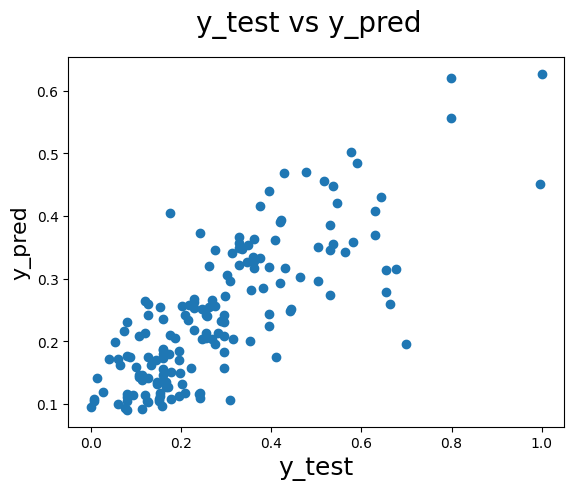

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# un gráfico de dispersión para visualizar la relación entre los valores reales y_test y las
# predicciones y_pred. Aquí hay una explicación de cómo

In [ ]:
y_test

265    0.247651
54     0.530201
171    0.328859
244    0.261745
268    0.245638
         ...   
413    0.154362
191    0.308725
310    0.221477
46     0.546980
50     0.536913
Name: price, Length: 164, dtype: float64

In [ ]:
y_pred

265    0.203362
54     0.345004
171    0.322256
244    0.255090
268    0.251010
         ...   
413    0.255380
191    0.295526
310    0.157814
46     0.420510
50     0.447275
Length: 164, dtype: float64

In [ ]:
#REGRESION LOGISTICA
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
#Dataset a utilizar
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [ ]:
X = np.asarray(housing[['bedrooms', 'bathrooms', 'stories']])
X[0:5]
y = np.asarray(housing['price'])
y [0:5]

array([13300000, 12250000, 12250000, 12215000, 11410000])

In [ ]:
#Estandarizacion de los datos
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

X[0:5]

array([[ 1.40341936,  1.42181174,  1.37821692],
       [ 1.40341936,  5.40580863,  2.53202371],
       [ 0.04727831,  1.42181174,  0.22441013],
       [ 1.40341936,  1.42181174,  0.22441013],
       [ 1.40341936, -0.57018671,  0.22441013]])

In [ ]:
#para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.
#Train/Test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
#test_size=0.2 indica que el 20% de los datos se utilizará como conjunto de prueba, mientras que el 80% se utilizará como conjunto de entrenamiento.
#random_state=4 se utiliza para establecer una semilla aleatoria y garantizar que la división de los datos sea reproducible.

Train set: (272, 3) (272,)
Test set: (273, 3) (273,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.001, solver='liblinear')

In [ ]:
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.01, multi_class='warn', solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
yhat

array([3500000, 3500000, 3500000, 7350000, 3500000, 3500000, 3500000,
       4200000, 3500000, 3500000, 3500000, 3500000, 3500000, 3500000,
       3500000, 7350000, 3500000, 8400000, 3640000, 3500000, 8400000,
       3500000, 5600000, 8400000, 4200000, 4200000, 3640000, 4200000,
       8400000, 3500000, 3500000, 4200000, 4200000, 3500000, 3500000,
       3500000, 3500000, 3500000, 3500000, 8400000, 3500000, 3500000,
       4200000, 3500000, 3500000, 3640000, 5600000, 3500000, 3500000,
       4200000, 3500000, 3500000, 8400000, 4200000, 3500000, 3500000,
       8400000, 3500000, 3500000, 3500000, 4200000, 3500000, 3500000,
       3500000, 3500000, 3500000, 3500000, 3640000, 8400000, 3500000,
       3500000, 4200000, 4200000, 3500000, 3500000, 3500000, 3500000,
       3640000, 4200000, 3500000, 8400000, 3500000, 5600000, 3500000,
       3500000, 3500000, 3500000, 3500000, 3500000, 8400000, 3500000,
       3500000, 3500000, 3500000, 3500000, 3500000, 3500000, 5600000,
       3500000, 3500

In [ ]:
from sklearn.metrics import accuracy_score

# y_test son las etiquetas verdaderas del conjunto de prueba
# yhat son las predicciones generadas por el modelo

accuracy_score(y_test, yhat)

0.018315018315018316

In [ ]:
#La regresión logística no es el enfoque más adecuado para predecir directamente los precios de las casas,
#ya que los precios son valores continuos y la regresión logística se utiliza principalmente para problemas de
#clasificación binaria o multiclase.